# Nine Card Analysis

In [1]:
import sys
sys.path.append("scripts")
from gameLogic import *
from scoring import *
from strategies import *
import matplotlib.pyplot as plt

In [2]:
strat_dict = {"Knock at 50": make_constant_score_knock_strategy(50), "Knock at 13": make_constant_score_knock_strategy(13),
             "Pile if Completes": draw_from_pile_if_completes, 
             "Discard Highest Useless": discard_highest_useless}

In [3]:
game = Game(player_names = ["Bailey", "Dan"],
            strategy_dict = strat_dict,
            knock_strategies = ["Knock at 50", "Knock at 13"],
            pile_strategies = ["Pile if Completes", "Pile if Completes"],
            discard_strategies = ["Discard Highest Useless", "Discard Highest Useless"],
            target_score = 25, total_rounds = 5, verbose = False, random_seed = 14,
            data_path = "data/results.csv", extra_comments = "TESTING", save_results = True)

game.play_game()

{'Bailey': [0, -6, -20, -28, -63, -55], 'Dan': [0, 6, 20, 28, 63, 55]}

In [4]:
pd.read_csv("data/results.csv")

,Unnamed: 0,avg_win,discard_strategy,draw_strategy,knock_strategy,notes,player_number,rounds,seed,sim_id,var_win,wins
0,0.0,-11.0,<function discard_highest_useless at 0x1184dae18>,<function draw_from_pile_if_completes at 0x118...,<function make_constant_score_knock_strategy.<...,TESTING,0.0,5.0,13.0,1.0,11.89958,1.0
1,1.0,11.0,<function discard_highest_useless at 0x1184dae18>,<function draw_from_pile_if_completes at 0x118...,<function make_constant_score_knock_strategy.<...,TESTING,1.0,5.0,13.0,1.0,11.89958,4.0
2,NaN,-11.0,Discard Highest Useless,Pile if Completes,Knock at 50,TESTING,0.0,5.0,14.0,2.0,14.00000,1.0
3,NaN,11.0,Discard Highest Useless,Pile if Completes,Knock at 13,TESTING,1.0,5.0,14.0,2.0,14.00000,4.0


In [9]:
game.players[1].score

[0, 4, 18, 44, 42, 61]

-12.2


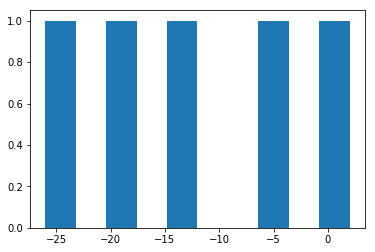

In [8]:
print(np.mean(np.diff(np.array(game.players[0].score))))
plt.hist(np.diff(np.array(game.players[0].score)));

## what do we want to store after trials:

We want:

1. to rank the strategies
2. to understand the difference between them (i.e. how much better is the advanced strategy than the basic strategy)


### what should we store:

We need:

1. player 1:
    - strategy
    - total rounds won
    - avg score per round
    - variance score per round
    - store a plot of the round scores (if possible)
    - total rounds played
2. player 2:
    - strategy
    - total rounds won
    - avg score per round
    - variance score per round
    - store a plot of the round scores (if possible)
    - total rounds played

### analysis we'll do:

For each combination of strategies, do the following:

1. 